In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


MODEL WITH AN EXTRA FEATURE OF TICKET

In [61]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test.head()                          #Reading the test and train file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df_train.isnull().sum()         #Getting known of the null values in the train dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df_test.isnull().sum()                  #Getting known of the null values in the test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
print(df_test.shape)
df_train.shape                      #Shape of train and test dataset

(418, 11)


(891, 12)

In [65]:
def respected(df):                      #Getting the title of from the names column of both the test and train dataset to calculate the average age of the person
    temp  = df.split(',')[1]
    temp1 = temp.split('.')[0]
    return temp1.strip()
df_train['respected'] = df_train['Name'].apply(respected)
df_test['respected'] = df_test['Name'].apply(respected)


In [66]:
def Age(df):                                                        #Calculating the average age of the person on the basis of the title they have 
    df_temp = pd.DataFrame()                                        #Doing this operation on both of the datasets with the help of a function 
                                                                    # Converting the Sex column to 1 and 0 because the machine cannot understand string 
    for key,dataf in df.groupby('respected'):
        temp = (dataf.Age.mean())
        dataf['Age'].fillna(temp,inplace = True)
        df_temp = pd.concat([df_temp,dataf],ignore_index=True)
    return df_temp
def Sex (df):
    if df == 'male':
        return 1
    return 0
lst = []
for df in [df_train,df_test]:
    df_temp = Age(df)
    df_temp['Sex'] = df_temp['Sex'].apply(Sex)
    lst.append(df_temp)
    df_temp = pd.DataFrame()
df_train,df_test = lst

In [67]:
df_train.Age = df_train.Age.apply(lambda x: np.floor(x))            #Converting the floating value of age to an integer
df_test.Age = df_test.Age.apply(lambda x: np.floor(x))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,respected
0,746,0,1,"Crosby, Capt. Edward Gifford",1,70.0,1,1,WE/P 5735,71.0000,B22,S,Capt
1,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.0,0,0,13213,35.5000,A26,C,Col
2,695,0,1,"Weir, Col. John",1,60.0,0,0,113800,26.5500,NaN,S,Col
3,31,0,1,"Uruchurtu, Don. Manuel E",1,40.0,0,0,PC 17601,27.7208,NaN,C,Don
4,246,0,1,"Minahan, Dr. William Edward",1,44.0,2,0,19928,90.0000,C78,Q,Dr


In [68]:
df_train.respected.unique()

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

In [69]:
df_train.Ticket[df_train.Ticket == 'LINE']

341    LINE
393    LINE
411    LINE
578    LINE
Name: Ticket, dtype: object

In [70]:
def Ticket(df):                                         #Ticket columns is filter with all the string litrals in it
    if df != 'LINE':
        return int(df.split(' ')[-1])
    
df_train['Ticket'] = df_train['Ticket'].apply(Ticket)
df_test['Ticket'] = df_test['Ticket'].apply(Ticket)

In [71]:
df_train.fillna(df_train.mean(),inplace = True)                              # Fillig the null values with the aberage value of the ticket colume

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [72]:
df_train.isnull().sum()         # Checking the null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
respected        0
dtype: int64

In [73]:
df_train.Ticket.unique()        #All unique values in ticket column

array([5.73500000e+03, 1.32130000e+04, 1.13800000e+05, 1.76010000e+04,
       1.99280000e+04, 2.90110000e+04, 2.44278000e+05, 1.32140000e+04,
       1.76110000e+04, 1.12379000e+05, 1.74650000e+04, 1.99720000e+04,
       1.17550000e+04, 1.13786000e+05, 1.13050000e+05, 3.49909000e+05,
       3.82652000e+05, 3.10129500e+06, 2.14400000e+03, 3.47088000e+05,
       2.66100000e+03, 2.48738000e+05, 2.65100000e+03, 2.34300000e+03,
       3.63291000e+05, 4.13300000e+03, 3.47077000e+05, 2.30136000e+05,
       2.30080000e+05, 1.13781000e+05, 3.76710000e+04, 2.91060000e+04,
       3.36380000e+04, 3.31120000e+04, 3.92096000e+05, 2.50649000e+05,
       2.31500000e+03, 1.13760000e+05, 2.62500000e+03, 2.07900000e+03,
       3.47082000e+05, 3.47742000e+05, 3.10128200e+06, 9.54900000e+03,
       1.13783000e+05, 3.50406000e+05, 3.30923000e+05, 3.30959000e+05,
       3.35677000e+05, 3.45764000e+05, 2.12300000e+03, 3.30958000e+05,
       1.43110000e+04, 3.10260000e+04, 3.46510000e+04, 1.13572000e+05,
      

In [74]:
df_train.isnull().sum()     #All null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
respected        0
dtype: int64

In [75]:
def sorter(df):                                     # Sorting the dataFrame with respect to pessanger id
    df = df.sort_values(by = 'PassengerId')
    
    return df
df_train = sorter(df_train)

df_test = sorter(df_test)

In [76]:
import sklearn                                                          # importing sklearn to creat a model and for the training and testing that model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_train[['Age','Sex','Pclass','Fare','Ticket']],df_train['Survived'])            #training of the model with features of Age,Sex,Pclass,Fare,Ticket


LogisticRegression()

In [77]:
df_test = df_test.fillna(df_test.Fare.mean())
df_test.to_csv('Cleaned_test.csv',header =1 ,index = False)
df_test['Survived'] = model.predict(df_test[['Age','Sex','Pclass','Fare','Ticket']])    # Testing of model 
df_test = df_test[['PassengerId','Survived']]                                           
df_test.to_csv('ridham.csv',header= 1,index = False)

In [78]:
df_test.head()          #the predict values of the model given some circumstances

,PassengerId,Survived
103,892,0
343,893,0
104,894,0
105,895,0
344,896,0


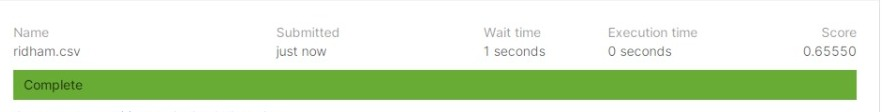

In [79]:
from IPython import display
display.Image('ridham.jpeg')


This is the accuracy I got on using Logistic regression and with ticket column